In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

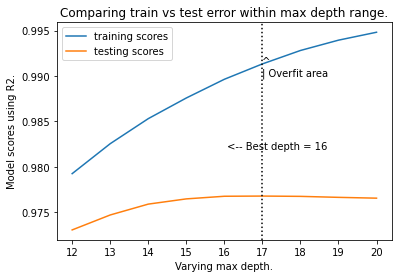

In [7]:
X_data = pd.read_csv('../data/samples.csv', names=[1,2,3,4,5,0,'score'])
y_data = X_data.pop('score')
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=.5, shuffle=True)

fig, ax = plt.subplots()

max_depth_list = range(12,21)
training_scores = []
test_scores = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(
    n_estimators = 100,
    max_depth = max_depth,
    n_jobs=-1)
    model.fit(X_train, y_train)
    training_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))


ax = sns.lineplot(max_depth_list, training_scores, label='training scores')
ax = sns.lineplot(max_depth_list, test_scores, label='testing scores')
ax.axvline(max_depth_list[test_scores.index(max(test_scores))],
             linestyle=':', color = 'k')
ax.text(16, .982, ' <-- Best depth = 16')
ax.text(17, .99, '^\n| Overfit area')
plt.title('Comparing train vs test error within max depth range.')
plt.xlabel('Varying max depth.')
plt.ylabel('Model scores using R2.')
plt.savefig('../images/rf_test.png')
plt.show()
plt.close('all')
